## 1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [2]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


/var/folders/5t/09kj7ysx0gb9v3yh9_3vfr980000gn/T/ipykernel_94207/3684019592.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


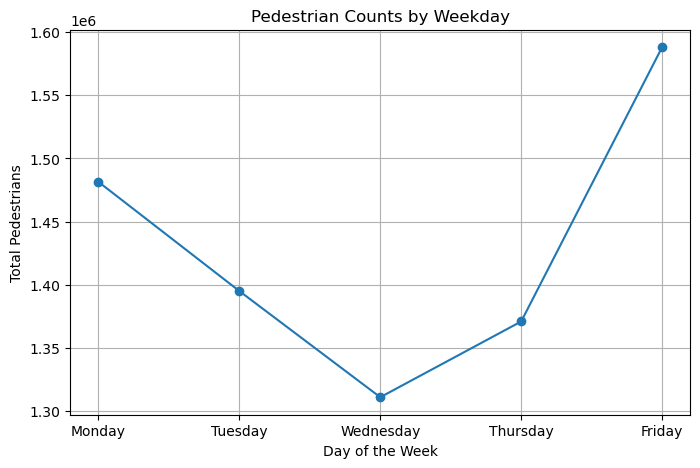

In [3]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.dayofweek
weekdays = df[df['day_of_week'] < 5]
pedestrain_wd = weekdays.groupby('day_of_week')['Pedestrians'].sum()

plt.figure(figsize=(8, 5))
plt.plot(pedestrain_wd.index, pedestrain_wd.values, marker='o', linestyle='-')
plt.xticks(ticks=range(5), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrians')
plt.title('Pedestrian Counts by Weekday')
plt.grid(True)
plt.show()

## 2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

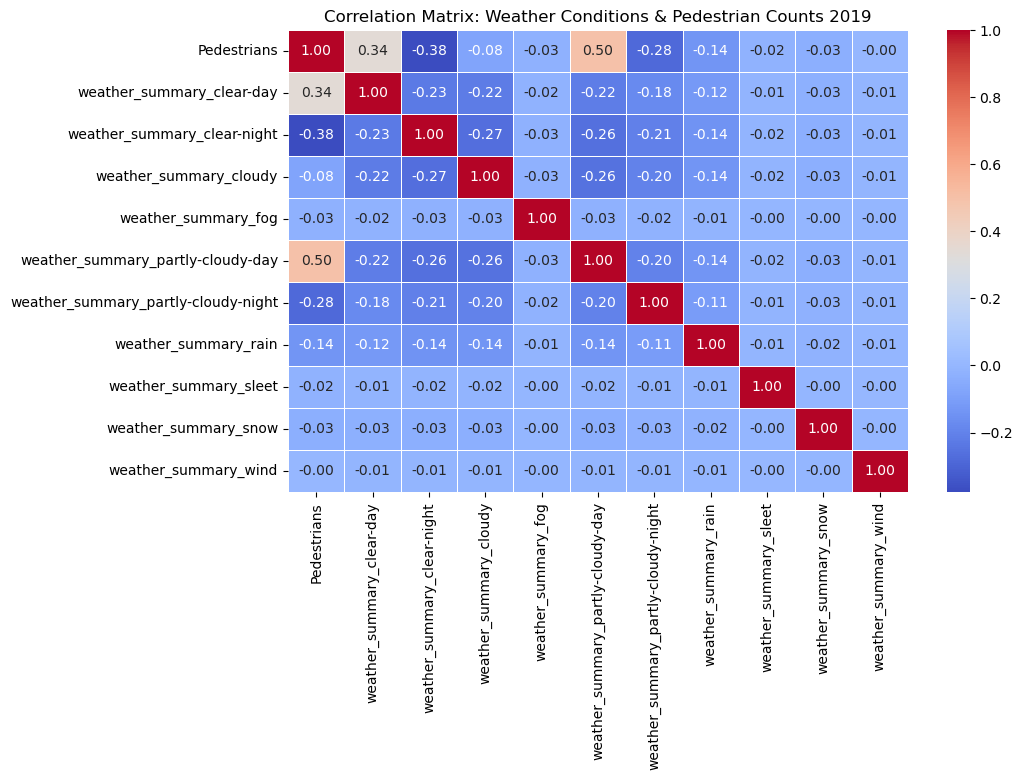

In [4]:
import seaborn as sns

df['year'] = df['hour_beginning'].dt.year
df_2019 = df[df['year'] == 2019]
df_encode = pd.get_dummies(df_2019, columns=['weather_summary'])

corr = ['Pedestrians'] + [col for col in df_encode.columns if 'weather_summary' in col]
corr_mtx = df_encode[corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix: Weather Conditions & Pedestrian Counts 2019')
plt.show()

## 3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

/var/folders/5t/09kj7ysx0gb9v3yh9_3vfr980000gn/T/ipykernel_94207/2293008669.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_count.index, y=time_count.values, palette='viridis')


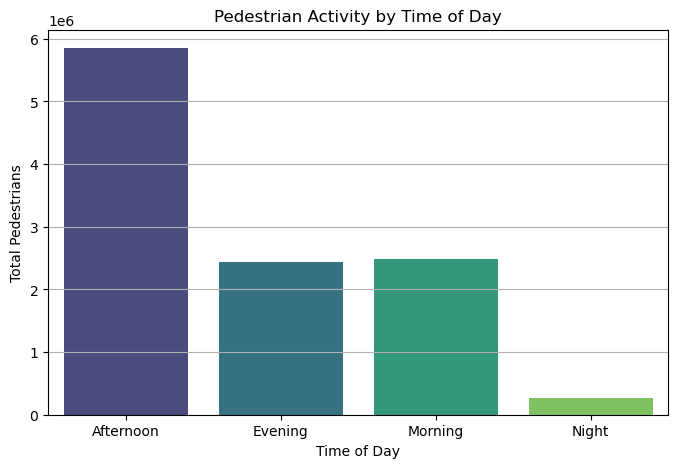

In [5]:
def time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(time)
time_count = df.groupby('time_of_day')['Pedestrians'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=time_count.index, y=time_count.values, palette='viridis')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrians')
plt.title('Pedestrian Activity by Time of Day')
plt.grid(axis='y')
plt.show()